<a href="https://colab.research.google.com/github/RAJAS-KAR/Akaike_Internship_Assignment/blob/main/0003.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
%pip install pandas pyarrow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
df = pd.read_parquet("/content/train.parquet", engine="pyarrow")

In [7]:
df

,Patient-Uid,Date,Incident
0,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2019-03-09,PRIMARY_DIAGNOSIS
1,a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f,2015-05-16,PRIMARY_DIAGNOSIS
3,a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f,2018-01-30,SYMPTOM_TYPE_0
4,a0dc950b-1c7c-11ec-b6ec-16262ee38c7f,2015-04-22,DRUG_TYPE_0
8,a0dc9543-1c7c-11ec-bb63-16262ee38c7f,2016-06-18,DRUG_TYPE_1
...,...,...,...
29080886,a0ee9f75-1c7c-11ec-94c7-16262ee38c7f,2018-07-06,DRUG_TYPE_6
29080897,a0ee1284-1c7c-11ec-a3d5-16262ee38c7f,2017-12-29,DRUG_TYPE_6
29080900,a0ee9b26-1c7c-11ec-8a40-16262ee38c7f,2018-10-18,DRUG_TYPE_10
29080903,a0ee1a92-1c7c-11ec-8341-16262ee38c7f,2015-09-18,DRUG_TYPE_6


group gthe target only

In [8]:
Target = df[df['Incident'] == 'TARGET DRUG']

extract the month from date

In [10]:
Target['Month'] = Target['Date'].dt.month

create pivot table for counting the incidents

In [11]:
df_pivot = pd.pivot_table(Target, values='Incident', index='Patient-Uid', columns='Month', aggfunc='count', fill_value=0)

table to numpy array and normalize 

In [12]:
X = df_pivot.to_numpy()

In [13]:
df_norm = df_pivot.div(df_pivot.sum(axis=1), axis=0)

using kmeans for clustring 

In [14]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_norm)

KMeans(n_clusters=4)

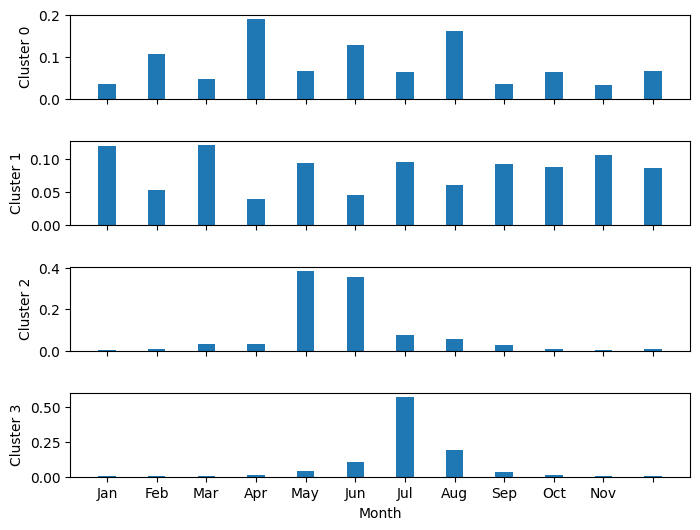

In [17]:
cluster_centers = kmeans.cluster_centers_

# create bar plot
import calendar
fig, ax= plt.subplots(kmeans.n_clusters, 1, figsize=(8, 6), sharex=True)
x = np.arange(len(cluster_centers[0]))
width = 0.35
for i, cluster in enumerate(cluster_centers):
    ax[i].bar(x, cluster, width)
    ax[i].set_ylabel(f'Cluster {i}')
ax[-1].set_xlabel('Month')

# set x-ticks and labels to represent months
month_labels = [calendar.month_name[(i+1) % 12][:3] for i in range(len(x))]
ax[-1].set_xticks(x)
ax[-1].set_xticklabels(month_labels)

# add some space for y-ticks
plt.subplots_adjust(hspace=0.5)

plt.show()

In [18]:

series_list = []

# Iterate through the range of columns
for i in range(0, len(df_pivot.columns) - 1):
    # Calculate the average of two sequential columns
    a = (df_pivot.iloc[:, i] + df_pivot.iloc[:, i+1]) / 2
   
    series_list.append(a)

# Combine the series into a single DataFrame
combined_df = pd.concat(series_list, axis=1)
combined_df

,0,1,2,3,4,5,6,7,8,9,10
Patient-Uid,,,,,,,,,,,
a0e9c384-1c7c-11ec-81a0-16262ee38c7f,0.0,0.0,0.0,0.0,0.0,0.5,1.0,1.0,0.5,0.0,0.0
a0e9c3b3-1c7c-11ec-ae8e-16262ee38c7f,0.5,0.5,0.5,1.0,1.5,1.5,2.0,1.5,0.5,0.5,0.5
a0e9c3e3-1c7c-11ec-a8b9-16262ee38c7f,0.5,0.5,0.0,0.5,0.5,0.0,0.0,0.0,0.5,0.5,0.5
a0e9c414-1c7c-11ec-889a-16262ee38c7f,0.5,0.5,1.0,1.5,1.0,1.0,1.5,1.5,0.5,0.5,1.5
a0e9c443-1c7c-11ec-9eb0-16262ee38c7f,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,1.5,1.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...
a0f0d4c5-1c7c-11ec-bfec-16262ee38c7f,0.0,0.0,0.0,0.0,0.5,0.5,0.5,0.5,0.0,0.0,0.0
a0f0d4f4-1c7c-11ec-b144-16262ee38c7f,0.0,0.0,0.0,0.0,0.0,0.5,0.5,0.0,0.0,0.0,0.0
a0f0d523-1c7c-11ec-89d2-16262ee38c7f,0.0,0.0,0.0,0.5,1.0,0.5,0.5,0.5,0.0,0.0,0.0


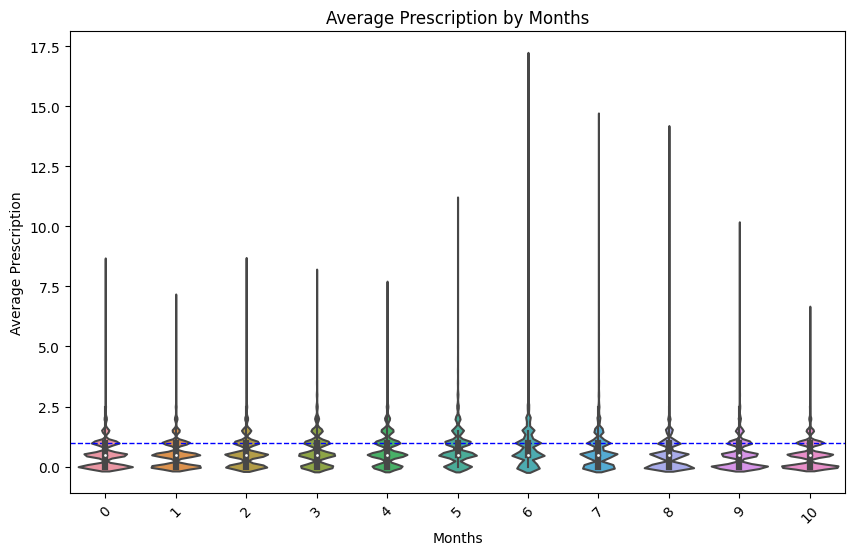

In [20]:
import seaborn as sns
# Plot the violin plot
plt.figure(figsize=(10, 6))
sns.set_palette("Set2")
plt.axhline(y=1, color='blue', linestyle='--', linewidth=1)
plt.xlabel("Months")
plt.ylabel("Average Prescription")
sns.violinplot(data=combined_df)

# Customize the plot
plt.title('Average Prescription by Months')
plt.xticks(rotation=45)

plt.show()